# Sales Analysis 

##### This notebook is based off of the following video:  https://www.youtube.com/watch?v=eMOA1pPVUc4&t=573s

#### Import Necessary Libraries

In [5]:
import pandas as pd

#### Merging 12 months of sales data into a single file

In [6]:
import os

data = pd.DataFrame()


for filename in os.listdir('./datasets/salesAnalysis/Sales_Data'):
    data = pd.concat([data, pd.read_csv("./datasets/salesAnalysis/Sales_Data/"+filename)])
data.to_csv('./datasets/salesAnalysis/combinedData.csv', encoding='utf-8', index=False)

#### Read in updated dataframe

In [7]:
all_data = pd.read_csv('./datasets/salesAnalysis/combinedData.csv')
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### What was the best month for sales?

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
results = all_data.groupby(['Month']).sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06


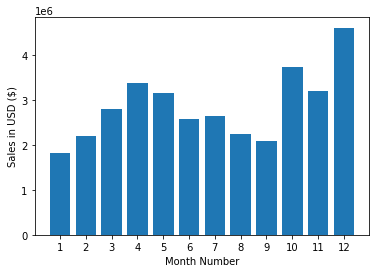

In [9]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#### What city had the highest number of sales?

In [10]:
all_data['Purchase Address'].str.split(', ', 1).tolist()
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(', ')[1])
results = all_data.groupby(['City']).sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2.779908e+06,2.795499e+06
Austin,11153.0,1.809874e+06,1.819582e+06
Boston,22528.0,3.637410e+06,3.661642e+06
Dallas,16730.0,2.752628e+06,2.767975e+06
Los Angeles,33289.0,5.421435e+06,5.452571e+06
New York City,27932.0,4.635371e+06,4.664317e+06
Portland,14053.0,2.307747e+06,2.320491e+06
San Francisco,50239.0,8.211462e+06,8.262204e+06
Seattle,16553.0,2.733296e+06,2.747755e+06


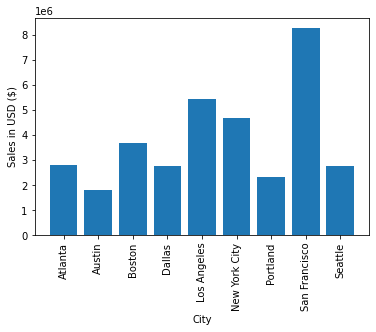

In [11]:
cities = results.index
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### What time should we display advertisements to maximize the likelihood of customer's buying product

In [12]:
all_data['Hour of Purchase'] = all_data['Order Date'].apply(lambda x:x.split(' ')[1][0:2])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour of Purchase
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,07
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
results = all_data.groupby(['Hour of Purchase']).count()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour of Purchase,,,,,,,,,
00,3910,3910,3910,3910,3910,3910,3910,3910,3910
01,2350,2350,2350,2350,2350,2350,2350,2350,2350
02,1243,1243,1243,1243,1243,1243,1243,1243,1243
03,831,831,831,831,831,831,831,831,831
04,854,854,854,854,854,854,854,854,854
05,1321,1321,1321,1321,1321,1321,1321,1321,1321
06,2482,2482,2482,2482,2482,2482,2482,2482,2482
07,4011,4011,4011,4011,4011,4011,4011,4011,4011
08,6256,6256,6256,6256,6256,6256,6256,6256,6256


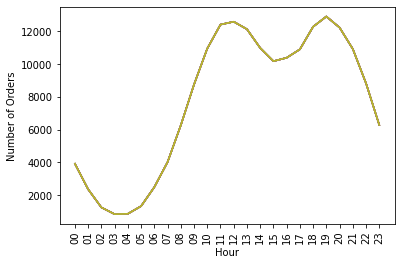

In [14]:
hours = results.index
plt.plot(hours, results)
plt.xticks(hours, rotation='vertical')
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

#### What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-17-50d7ea3b1e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### What product sold the most?  WHy do you think it sold the most?

In [60]:
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']
quantity_ordered.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

Text(0, 0.5, 'Amount Ordered')

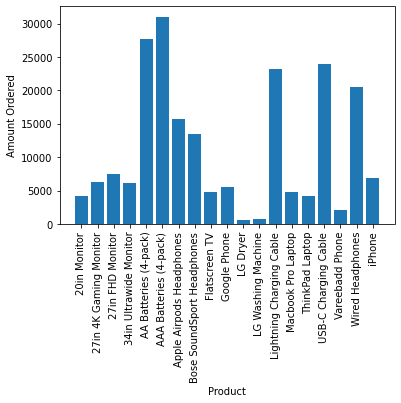

In [61]:
plt.bar(quantity_ordered.index, quantity_ordered)
plt.xticks(quantity_ordered.index, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Amount Ordered')